Задание 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [2]:
boston = load_boston()

In [3]:
data = boston.data

In [4]:
features = boston.feature_names

In [5]:
X = pd.DataFrame(data, columns = features)

In [6]:
Y  = boston.target

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
skaler = StandardScaler(with_mean = False)

In [10]:
X_train_sc = pd.DataFrame(skaler.fit_transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(skaler.transform(X_test), columns=X_test.columns)

In [11]:
X_train_sc.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.694865,0.000000,2.628491,0.0,5.222922,7.485465,3.479940,0.986899,2.797502,4.012849,9.074814,3.821411,3.507672
1,0.070779,0.000000,1.182095,0.0,4.576437,8.233447,2.020726,2.113421,0.466250,1.849767,9.434213,4.325931,1.192693
2,0.003910,1.513591,0.880036,0.0,3.724947,8.511471,0.833326,3.119769,0.116563,1.831691,7.592295,3.961045,1.102572
3,0.795393,0.000000,2.628491,0.0,5.222922,8.613084,3.043606,0.949832,2.797502,4.012849,9.074814,0.027555,3.279554
4,0.081881,0.000000,1.182095,0.0,4.576437,8.082440,2.485671,1.783577,0.466250,1.849767,9.434213,4.274867,1.588380


In [12]:
X_test_sc.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.010354,0.000000,0.588143,0.000000,4.338258,9.054816,3.007841,1.243219,0.582813,1.783488,7.457520,4.324619,1.272957
1,0.006367,1.729819,0.930864,3.874063,3.802355,9.537476,1.176670,1.915637,0.466250,1.530426,7.906769,4.339928,0.497073
2,0.011929,0.000000,4.028417,0.000000,5.180390,8.443729,3.533587,0.877624,0.466250,4.283988,9.029889,4.265682,2.544506
3,0.010338,0.000000,1.569834,0.000000,3.513138,8.559455,0.278967,2.483948,0.466250,1.837716,8.625566,4.274430,0.777292
4,0.574248,0.000000,2.628491,0.000000,6.065055,8.886873,3.283232,1.112569,2.797502,4.012849,9.074814,4.210790,2.431855


In [13]:
from sklearn.manifold import TSNE

In [14]:
t_sne = TSNE(n_components=2, learning_rate=250, random_state = 42)

In [15]:
X_train_t_sne = t_sne.fit_transform(X_train_sc)

In [16]:
X_train_sc.shape

(404, 13)

In [17]:
X_train_t_sne.shape

(404, 2)

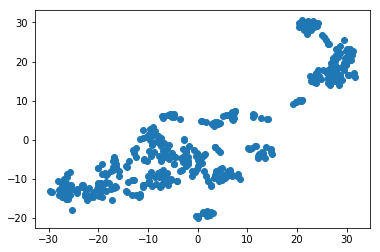

In [18]:
plt.scatter(X_train_t_sne[:,0], X_train_t_sne[:,1])

In [19]:
kmeans = KMeans(n_clusters=3)

In [20]:
labels_train = kmeans.fit_predict(X_train_sc)

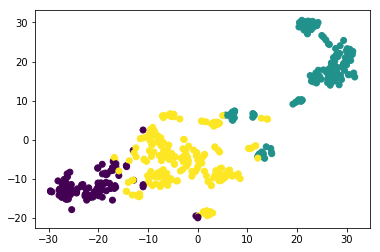

In [21]:
plt.scatter(X_train_t_sne[:,0], X_train_t_sne[:,1], c=labels_train)

In [22]:
X_train.loc[labels_train == 0, 'CRIM'].mean()

0.07356558139534886

In [23]:
X_train.loc[labels_train == 1, 'CRIM'].mean()

10.715219062500003

In [24]:
X_train.loc[labels_train == 2, 'CRIM'].mean()

0.4221666842105262

In [34]:
Y_train[labels_train == 0].mean()


27.78837209302326

In [37]:
Y_train[labels_train == 1].mean()

16.1796875

In [36]:
Y_train[labels_train == 2].mean()

24.99473684210526

In [40]:
labels_train_test = kmeans.predict(X_test_sc)

In [41]:
labels_train_test

array([2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2,
       1, 2, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2])

In [44]:
Y_test[labels_train_test == 0].mean()

34.3111111111111

In [45]:
Y_test[labels_train_test == 1].mean()

16.710526315789473

In [46]:
Y_test[labels_train_test == 2].mean()

22.690909090909095